#Libraries


In [1]:
import pandas as pd #importing panda as pd
from scipy.stats import ttest_ind # for t-test
import matplotlib.pyplot as plt # for plotting (like bar plot, histogram,scatter plot)
import numpy as np

#Task1
Download the dataset and create an IPython Notebook or a Google Colab notebook for this assignment.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Task2
Load the dataset into a pandas dataframe and display the first 10 rows of the dataframe to gain familiarity with the data structure.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/StudentPerformance Dataset/StudentsPerformance.csv')
result = df.head(10) #This function will return first 10 rows
print(result)

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   
5  female        group B          associate's degree      standard   
6  female        group B                some college      standard   
7    male        group B                some college  free/reduced   
8    male        group D                 high school  free/reduced   
9  female        group B                 high school  free/reduced   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                  

In [4]:
print(df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

#Task3
Perform exploratory data analysis:


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


df.info tells us that there are 1000 rows, with no row to have any null values. And it has total 8 columns. Also there we can find data types of each column.

In [6]:
df.dtypes # for specifically checking data types

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
df.shape  # for specifically checking rows and columns

(1000, 8)

In [8]:
df.isnull() #checking if there is any null value

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
df.duplicated() #checking if there is ant duplicated value

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [11]:
df.duplicated().sum()

0

In [12]:
#.value_counts() function return a Series containing counts of unique values

print(df["gender"].value_counts())
print(df["race/ethnicity"].value_counts())
print(df["parental level of education"].value_counts())
print(df["lunch"].value_counts())
print(df["test preparation course"].value_counts())
print(df["math score"].value_counts())
print(df["reading score"].value_counts())
print(df["writing score"].value_counts())


female    518
male      482
Name: gender, dtype: int64
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64
standard        645
free/reduced    355
Name: lunch, dtype: int64
none         642
completed    358
Name: test preparation course, dtype: int64
65    36
62    35
69    32
59    32
61    27
      ..
24     1
28     1
33     1
18     1
8      1
Name: math score, Length: 81, dtype: int64
72    34
74    33
64    32
67    30
73    30
      ..
28     1
26     1
17     1
32     1
40     1
Name: reading score, Length: 72, dtype: int64
74    35
70    33
68    31
73    28
80    27
      ..
28     1
35     1
19     1
22     1
23     1
Name: writing score, Length: 77, dtype: int64


 .to_frame() function converts the series object to a dataframe

In [13]:
(df["gender"].value_counts()).to_frame()

,gender
female,518
male,482


In [14]:
(df["gender"].value_counts()).to_frame().values

array([[518],
       [482]])

In [15]:
(df["race/ethnicity"].value_counts()).to_frame()

,race/ethnicity
group C,319
group D,262
group B,190
group E,140
group A,89


In [16]:
(df["parental level of education"].value_counts()).to_frame()

,parental level of education
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


In [17]:
(df["lunch"].value_counts()).to_frame()

,lunch
standard,645
free/reduced,355


In [18]:
(df["test preparation course"].value_counts()).to_frame()


,test preparation course
none,642
completed,358


In [19]:
(df["math score"].value_counts()).to_frame()

,math score
65,36
62,35
69,32
59,32
61,27
...,...
24,1
28,1
33,1
18,1


In [20]:
(df["reading score"].value_counts()).to_frame()

,reading score
72,34
74,33
64,32
67,30
73,30
...,...
28,1
26,1
17,1
32,1


In [21]:
(df["writing score"].value_counts()).to_frame()

,writing score
74,35
70,33
68,31
73,28
80,27
...,...
28,1
35,1
19,1
22,1


In [22]:
df.describe() #it will return the description of numeric data in a dataframe by default

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


count returns non-empty values, our data has 1000 data rows and returns 1000-which means there is no empty values. Also, here max value and mean value has not much difference

In [23]:
df.corr()

<ipython-input-23-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


.corr() method shows the correlation of the columns. Each column here is  correlated with one another in a good way, as all the values are closer to 1. It means that when one value increases, the other also goes up.

In [24]:
df.describe(include = ['object']) #this will return description of object data types

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


here, count shows the non-null rows. unique shows the different values in each columns, like gender has two types- male and female. top shows the most common values in a column and freq shows the frequency of most common value.

In [25]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [26]:
outliers = find_outliers_IQR(df['math score'])

print('“number of outliers: “'+ str(len(outliers)))

print('“max outlier value: “'+ str(outliers.max()))

print('“min outlier value: “'+ str(outliers.min()))

outliers

“number of outliers: “8
“max outlier value: “26
“min outlier value: “0


17     18
59      0
145    22
338    24
466    26
787    19
842    23
980     8
Name: math score, dtype: int64

In [27]:
outliers = find_outliers_IQR(df['writing score'])

print('“number of outliers: “'+ str(len(outliers)))

print('“max outlier value: “'+ str(outliers.max()))

print('“min outlier value: “'+ str(outliers.min()))

outliers

“number of outliers: “5
“max outlier value: “23
“min outlier value: “10


59     10
76     22
327    19
596    15
980    23
Name: writing score, dtype: int64

In [28]:
outliers = find_outliers_IQR(df['reading score'])

print('“number of outliers: “'+ str(len(outliers)))

print('“max outlier value: “'+ str(outliers.max()))

print('“min outlier value: “'+ str(outliers.min()))

outliers

“number of outliers: “6
“max outlier value: “28
“min outlier value: “17


59     17
76     26
211    28
327    23
596    24
980    24
Name: reading score, dtype: int64

 There are very little outliers present in the numeric values and I think they show the variations in the population, for this reason I kept the outliers as it is.  

#Task4

In [29]:
#Create a bar plot to show the distribution of male and female students in the dataset.
students = df['gender'].value_counts()
students

female    518
male      482
Name: gender, dtype: int64

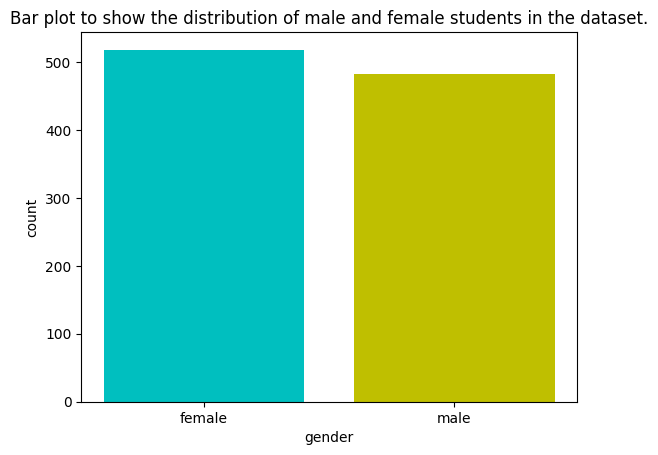

In [30]:
x= students.index
y= students.values
plt.bar(x,y,color=('c','y'))

#function for add title
plt.title("Bar plot to show the distribution of male and female students in the dataset.")
plt.grid(False)
#function to add label
plt.xlabel("gender")
plt.ylabel("count")

# function to show the plot
plt.show()

we can see from the bar plot that most of the students in the dataset are of the gender female.

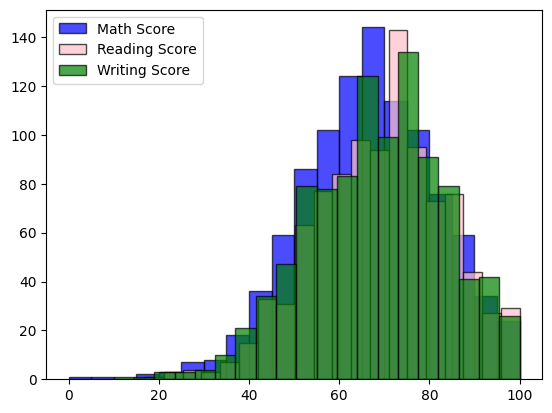

In [31]:
#Create a histogram to show the distribution of the scores in math, reading, and writing.
m_score = df[['math score']]
r_score = df[['reading score']] #here we are extracting the score columns and saving the dataframes in the variables
w_score = df[['writing score']]

# plotting first histogram
plt.hist(m_score, bins = 20, label='Math Score', alpha=.7, color='blue', edgecolor='black')

# plotting second histogram
plt.hist(r_score, bins = 20, label="Reading Score", color='pink',alpha=.7,
         edgecolor='black')

# plotting third histogram
plt.hist(w_score, bins = 20,label="Writing Score", color='green', alpha=.7,
         edgecolor='black')
plt.legend()#

# Showing the plot using plt.show()
plt.show()

in this histogram, we can see that there is overlap of the math, reading and writing score. The three columns has the values almost in the same range, but the 'math score' column has some lowest values, other than the other two columns. "reading score" and "writing score" columns also has some values far from the most frequent values. The most frequent score among the variables is  between 65-75 which is in "math score" column. The second most frequent marks between 70-75, which is in "writing score" column.
The highest score one got is in "writing score"

In [32]:
#Create a bar plot to show the average scores in math, reading, and writing for each gender.
avgScore = df.pivot_table(values=['math score', 'reading score', 'writing score'], index=['gender'], aggfunc='mean')
#creating dataframe using pivot_table of 3 columns and have set index ='gender' because we want to group by female and male in pivot table

<Figure size 1000x500 with 0 Axes>

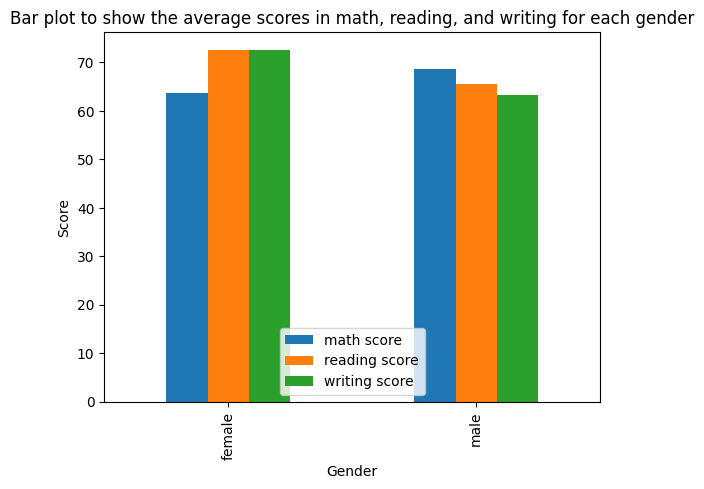

In [33]:
plt.figure(figsize=(10, 5))#specifying figure size
avgScore.plot(kind='bar')#plot() makes plots of dataframe avgScore
plt.title('Bar plot to show the average scores in math, reading, and writing for each gender')
plt.xlabel('Gender')
plt.ylabel('Score')
plt.legend( loc ="lower center")# is used to Place a legend on the axes.
# Showing the plot using plt.show()
plt.show()

It is visible from the bar plot that female students has scored btter than male students. Also, math students has scored better in maths than the female students. Male students has earned lowest scors in writing part.


Text(0, 0.5, 'writing score and reading score')

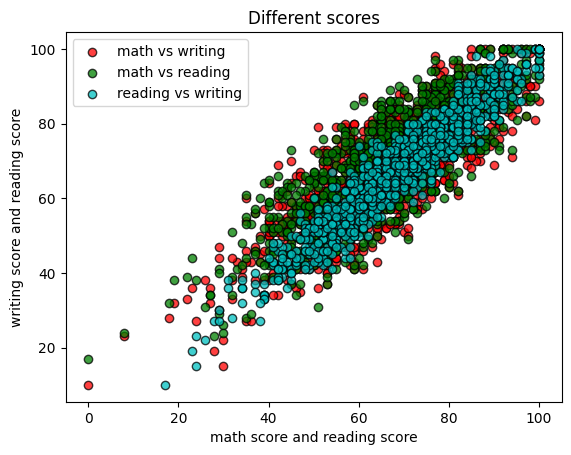

In [78]:
math_score = df['math score']
reading_score = df['reading score']#saving the dataframes in the variables
writing_score = df['writing score']

#calling the scatter()method for showing the scatter plot.
plt.scatter(math_score, writing_score,  color='r', edgecolor = 'black', linewidth = 1, alpha = 0.75, label = 'math vs writing')
plt.scatter(math_score, reading_score, color = 'g', edgecolor = 'black', linewidth = 1, alpha = 0.75, label = 'math vs reading')
plt.scatter(reading_score, writing_score, color = 'c', edgecolor = 'black', linewidth = 1, alpha = 0.75, label = 'reading vs writing')

plt.legend()# is used to Place a legend on the axes.
plt.title('Different scores')
plt.xlabel('math score and reading score')#specifying labels of x-axis
plt.ylabel('writing score and reading score')#specifying labels of y-axis

The scatter plot shows moderately strong and positive relationships among different scores.

#Task5 Perform basic statistical analysis

In [35]:
#Calculate mean, median, and mode for math, reading, and writing scores.
mScore_mean = df['math score'].mean()
mScore_median = df['math score'].median()
mScore_mode = df['math score'].mode()
print('Mean: ' ,mScore_mean)
print('Median: ' ,mScore_mean)
print('Mode: ',mScore_mean)

Mean:  66.089
Median:  66.089
Mode:  66.089


In [36]:
rScore_mean = df['reading score'].mean()
rScore_median = df['reading score'].median()
rScore_mode = df['reading score'].mode()
print('Mean: ' ,rScore_mean)
print('Median: ' ,rScore_mean)
print('Mode: ',rScore_mean)

Mean:  69.169
Median:  69.169
Mode:  69.169


In [37]:
wScore_mean = df['writing score'].mean()
wScore_median = df['writing score'].median()
wScore_mode = df['writing score'].mode()
print('Mean: ' ,rScore_mean)
print('Median: ' ,rScore_mean)
print('Mode: ',rScore_mean)

Mean:  69.169
Median:  69.169
Mode:  69.169


as the mean, meadian and mode are all the same for each column, we can say that the distribution is symmetric

In [38]:
 #Calculate the standard deviation for math, reading, and writing scores.
mScore_std = df['math score'].std()
rScore_std = df['reading score'].std()
wScore_std = df['writing score'].std()
print("Math Score Standard Deviation: ", mScore_std)
print("Reading Score Standard Deviation: ", rScore_std)
print("Writing Score Standard Deviation: ", wScore_std)

Math Score Standard Deviation:  15.16308009600945
Reading Score Standard Deviation:  14.600191937252216
Writing Score Standard Deviation:  15.19565701086965


In [44]:
#Test if there's a significant difference between male and female students'
#performance in math, reading, and writing using an appropriate statistical test (e.g., t-test).
group1 = df[df['gender']=='female']
group2= df[df['gender']=='male']


<ipython-input-44-4a64b37c4fe8>:6: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



math score       68.728216
reading score    65.473029
writing score    63.311203
dtype: float64

In [48]:
group3 = df[df['gender']=='male'].mean() # to check the mean values of scores where gender = male
group3

<ipython-input-48-f6f74b357992>:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



math score       68.728216
reading score    65.473029
writing score    63.311203
dtype: float64

In [47]:
group4 = df[df['gender']=='female'].mean() # to check the mean values of scores where gender = female
group4

<ipython-input-47-f18e206aa25e>:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



math score       63.633205
reading score    72.608108
writing score    72.467181
dtype: float64

In [41]:
ttest_ind(group1['math score'], group2['math score'])

Ttest_indResult(statistic=-5.383245869828983, pvalue=9.120185549328822e-08)

In [42]:
ttest_ind(group1['reading score'], group2['reading score'])

Ttest_indResult(statistic=7.959308005187657, pvalue=4.680538743933289e-15)

In [43]:
ttest_ind(group1['writing score'], group2['writing score'])

Ttest_indResult(statistic=9.979557910004507, pvalue=2.019877706867934e-22)

as all the pValues are much less than 0.05, we can reject the null hypothesis and say that there is significant differenece between the scores of male and female students.

In conclusion-
the dataset has no null or duplicate values,
math score, wrting score and reading scores are correlated with one another,
the dataset has more female students than male,
female students' average score is greater than that of male students', but male students has done better in math than female students.


